In [8]:
import networkx as nx
import seaborn as sns
import numpy as np
from numpy import inf

In [9]:
from os.path import join, abspath, dirname

path = join('.', '..', 'tests/out/graph.gexf')
G = nx.read_gexf(path)

In [10]:
nodelist = list(G.nodes())
matrix = np.array(nx.floyd_warshall_numpy(G, nodelist=nodelist, weight='weight'))
matrix

array([[   0.        ,  171.66666667,  171.66666667,  349.66666667,
         999.66666667,  999.66666667,  999.66666667, 1013.        ,
        1013.        , 1053.        , 1053.        , 1053.        ,
        1053.        , 1053.        , 1186.33333333, 1238.33333333,
        1391.22222222, 1262.        , 1177.46666667, 1177.46666667,
        1161.        ,  518.66666667,  884.33333333, 1875.66666667,
         518.66666667,  349.66666667,  518.33333333,  349.66666667],
       [1050.33333333,    0.        , 1053.        ,  881.33333333,
        1881.        , 1881.        , 1881.        , 1894.33333333,
        1894.33333333, 1934.33333333, 1934.33333333, 1934.33333333,
        1934.33333333, 1934.33333333, 2067.66666667, 2119.66666667,
        2272.55555556, 2143.33333333, 2058.8       , 2058.8       ,
        2042.33333333, 1050.33333333, 1416.        , 2407.33333333,
        1050.33333333,  881.33333333, 1050.        ,  881.33333333],
       [ 347.        ,  349.66666667,    0.   

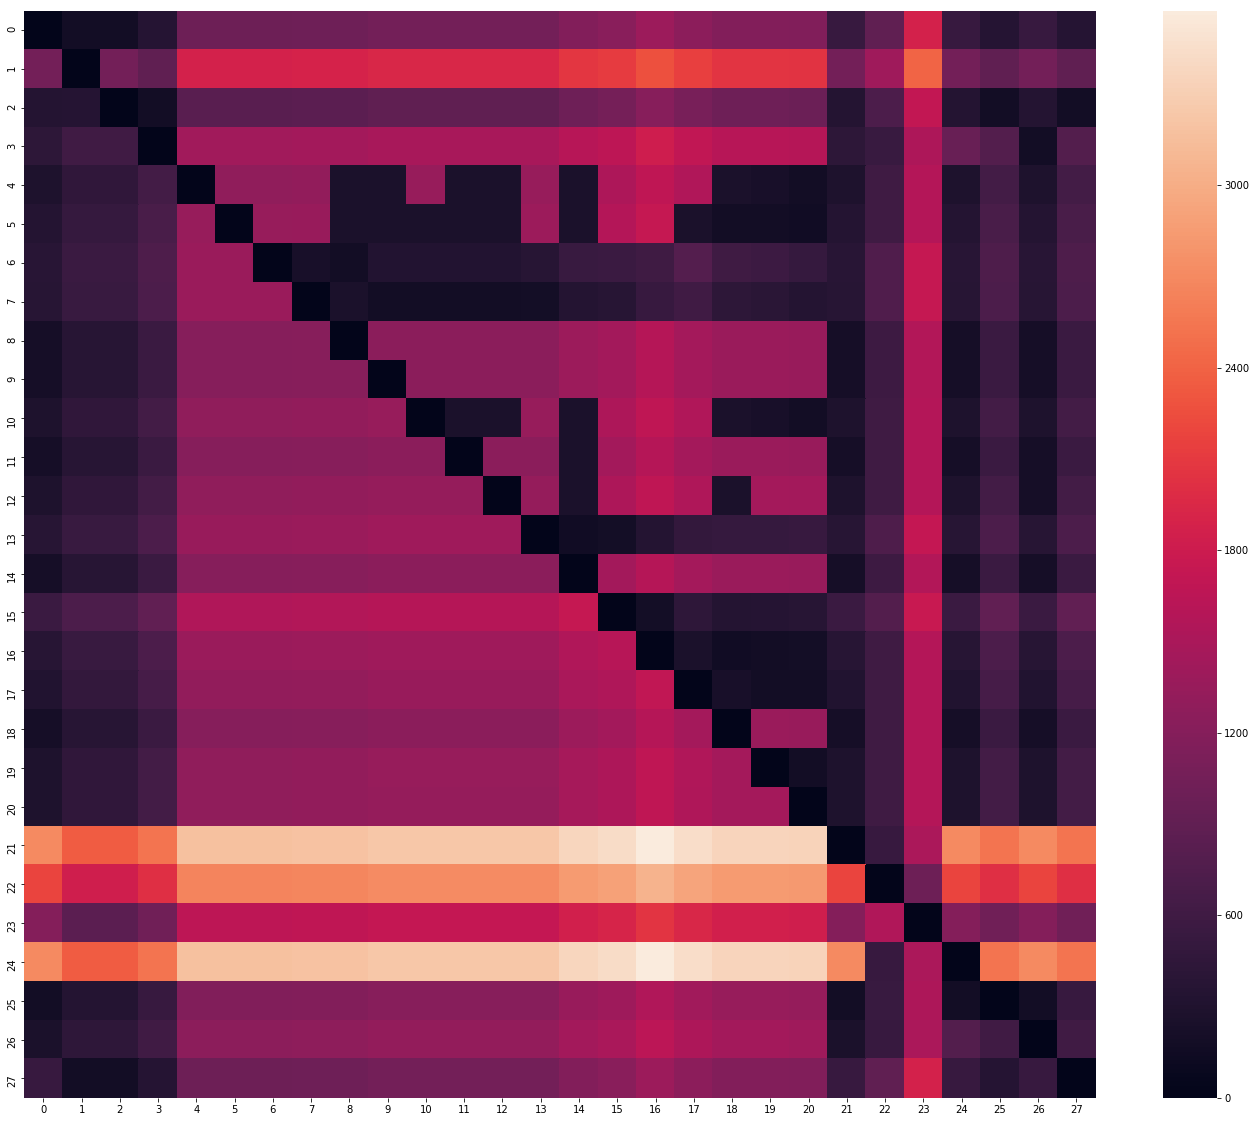

In [11]:
import pylab as plt

plot_matrix = matrix.copy()
plot_matrix[plot_matrix == inf] = 10000
plot_matrix = np.nan_to_num(plot_matrix)

fig = plt.figure(figsize=(24,20))
ax = fig.gca()
step = 1
sns.heatmap(plot_matrix[::step, ::step], ax=ax)

In [12]:
import numpy as np

cycles = []
paths = []
for i, _ in enumerate(matrix):
    for j, _ in enumerate(matrix[i]):
        a = matrix[i, j]
        b = matrix[j, i]
        if i == j:
            continue

        anode = nodelist[i]
        bnode = nodelist[j]
        if a != np.inf:
            paths.append((anode, bnode, a))
        if b != np.inf:
            paths.append((bnode, anode, b))
        if a != np.inf and b != np.inf:
            cycles.append((anode, bnode, a, b, a + b))


cycles = sorted(cycles, key=lambda c: c[-1])
print("Cycles: {}".format(len(cycles)))
print("Paths: {}".format(len(paths)))

Cycles: 756
Paths: 1512


In [13]:
for c in cycles[:10]:
    print(c)

("(4227, 5920, 1, 'PCR_PRODUCT')", "(5947, 4219, 1, 'PCR_PRODUCT')", 178.0, 171.66666666666666, 349.66666666666663)
("(5947, 4219, 1, 'PCR_PRODUCT')", "(4227, 5920, 1, 'PCR_PRODUCT')", 171.66666666666666, 178.0, 349.66666666666663)
("(0, 4219, 1, 'PCR_PRODUCT')", "(4227, 5920, 1, 'PCR_PRODUCT')", 171.66666666666666, 347.0, 518.6666666666666)
("(0, 4219, 1, 'PCR_PRODUCT')", "(5947, 0, 1, 'PCR_PRODUCT')", 349.66666666666663, 169.0, 518.6666666666666)
("(4227, 5920, 1, 'PCR_PRODUCT')", "(0, 4219, 1, 'PCR_PRODUCT')", 347.0, 171.66666666666666, 518.6666666666666)
("(4227, 5920, 1, 'PCR_PRODUCT')", "(5947, 0, 1, 'PCR_PRODUCT')", 178.0, 340.66666666666663, 518.6666666666666)
("(5947, 0, 1, 'PCR_PRODUCT')", "(0, 4219, 1, 'PCR_PRODUCT')", 169.0, 349.66666666666663, 518.6666666666666)
("(5947, 0, 1, 'PCR_PRODUCT')", "(4227, 5920, 1, 'PCR_PRODUCT')", 340.66666666666663, 178.0, 518.6666666666666)
("(0, 4219, 1, 'PCR_PRODUCT')", "(9407, 137, 1, 'PCR_PRODUCT')", 518.3333333333333, 262.3333333333333,

In [14]:
from more_itertools import pairwise

for c in cycles[:20]:
    print(c)
    path1 = nx.shortest_path(G, c[0], c[1], weight='weight')
    path2 = nx.shortest_path(G, c[1], c[0], weight='weight')
    path = path1 + path2[1:]
    for n1, n2 in pairwise(path):
        edata = G[n1][n2]
        print('{} {} {} > {}'.format(edata['weight'], edata['name'], n1, n2))
    print()

("(4227, 5920, 1, 'PCR_PRODUCT')", "(5947, 4219, 1, 'PCR_PRODUCT')", 178.0, 171.66666666666666, 349.66666666666663)
178.0 synthesis (4227, 5920, 1, 'PCR_PRODUCT') > (5947, 4219, 1, 'PCR_PRODUCT')
171.66666666666666 synthesis (5947, 4219, 1, 'PCR_PRODUCT') > (4227, 5920, 1, 'PCR_PRODUCT')

("(5947, 4219, 1, 'PCR_PRODUCT')", "(4227, 5920, 1, 'PCR_PRODUCT')", 171.66666666666666, 178.0, 349.66666666666663)
171.66666666666666 synthesis (5947, 4219, 1, 'PCR_PRODUCT') > (4227, 5920, 1, 'PCR_PRODUCT')
178.0 synthesis (4227, 5920, 1, 'PCR_PRODUCT') > (5947, 4219, 1, 'PCR_PRODUCT')

("(0, 4219, 1, 'PCR_PRODUCT')", "(4227, 5920, 1, 'PCR_PRODUCT')", 171.66666666666666, 347.0, 518.6666666666666)
171.66666666666666 synthesis (0, 4219, 1, 'PCR_PRODUCT') > (4227, 5920, 1, 'PCR_PRODUCT')
178.0 synthesis (4227, 5920, 1, 'PCR_PRODUCT') > (5947, 0, 1, 'PCR_PRODUCT')
169.0 synthesis (5947, 0, 1, 'PCR_PRODUCT') > (0, 4219, 1, 'PCR_PRODUCT')

("(0, 4219, 1, 'PCR_PRODUCT')", "(5947, 0, 1, 'PCR_PRODUCT')", 349

In [171]:
for n in list(G.nodes())[:100]:
    print(n)

(0, 4219, 1, 'PCR_PRODUCT')
(4227, 4261, 1, 'PCR_PRODUCT')
(4227, 5920, 1, 'PCR_PRODUCT')
(5947, 9408, 1, 'PCR_PRODUCT')
(5947, 7182, 1, 'PCR_PRODUCT')
(5947, 7297, 1, 'PCR_PRODUCT')
(5947, 7355, 1, 'PCR_PRODUCT')
(5947, 7527, 1, 'PCR_PRODUCT')
(5947, 7528, 1, 'PCR_PRODUCT')
(5947, 7570, 1, 'PCR_PRODUCT')
(5947, 8177, 1, 'PCR_PRODUCT')
(5947, 8248, 1, 'PCR_PRODUCT')
(5947, 8325, 1, 'PCR_PRODUCT')
(5947, 8508, 1, 'PCR_PRODUCT')
(5947, 9210, 1, 'PCR_PRODUCT')
(5947, 9224, 1, 'PCR_PRODUCT')
(5947, 9255, 1, 'PCR_PRODUCT')
(5947, 9407, 1, 'PCR_PRODUCT')
(5947, 5980, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 6002, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 6041, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 6082, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 6106, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 6246, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 6268, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 7205, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 7219, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(594